In [12]:
# =============================================================================
# HÜCRE 1: GEREKLİ KÜTÜPHANELERİ YÜKLEME
# Bu hücre, projemizde kullanacağımız tüm araçları tek bir yerde toplar.
# Veri işleme, görselleştirme, modelleme ve değerlendirme için her şey burada.
# =============================================================================

# --- 1. Temel Veri İşleme ve Sayısal İşlemler ---
import pandas as pd  # Veri setlerini (DataFrame) yönetmek için temel kütüphane
import numpy as np   # Sayısal işlemler, diziler ve matematiksel fonksiyonlar için

# --- 2. Veri Görselleştirme ---
import matplotlib.pyplot as plt  # Temel çizimler ve grafikler için
import seaborn as sns            # Daha şık ve istatistiksel grafikler için (heatmap, pairplot vb.)

# --- 3. Veri Ön İşleme (Preprocessing) ---
from sklearn.model_selection import train_test_split  # Veriyi eğitim ve test setlerine ayırmak için
from sklearn.preprocessing import StandardScaler      # Sayısal verileri standartlaştırmak (Z-score normalizasyonu)
from sklearn.preprocessing import MinMaxScaler        # Sayısal verileri belirli bir aralığa (genellikle 0-1) sıkıştırmak
from sklearn.preprocessing import OneHotEncoder 
from sklearn.preprocessing import PolynomialFeatures  # <-- EKLENEN SATIR      # Kategorik verileri sayısal formata çevirmek için
from sklearn.impute import SimpleImputer              # Eksik (NaN) verileri doldurmak için

# --- 4. Sınıflandırma Modelleri (Classification Models) ---
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier

# --- 5. Model Değerlendirme (Evaluation Metrics) ---
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve, roc_auc_score

# --- 6. Hiperparametre Ayarlama ---
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# --- Diğer Yardımcı Araçlar ---
import warnings
warnings.filterwarnings('ignore') # Genellikle uyarı mesajlarını gizlemek için kullanılır, raporlama yaparken kapatılabilir.

# --- Grafik Ayarları (Opsiyonel ama önerilir) ---
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
print("✅ Tüm gerekli kütüphaneler başarıyla yüklendi.")

✅ Tüm gerekli kütüphaneler başarıyla yüklendi.


In [7]:
# =============================================================================
# HÜCRE 2: VERİYİ YÜKLEME VE İLK HAZIRLIK
# Bu hücre, farklı formatlardaki (.csv, .txt) veri setlerini okumak için
# esnek bir yapı sunar. Lütfen kendi veri setinize uygun bölümü
# yorum satırından çıkararak (# kaldırarak) kullanın.
# =============================================================================

# --- PARAMETRELER (Lütfen burayı kendi dosyanıza göre düzenleyin) ---
FILE_PATH = 'dataFinal.csv'  # <-- DOSYA YOLUNUZU BURAYA YAZIN
TARGET_COLUMN = 'class'  # <-- HEDEF (TAHMİN EDİLECEK) SÜTUNUN ADI

# --- SEÇENEK 1: CSV veya TXT dosyası, başlık satırı (header) VAR ---
# Örnek: datatraining.txt gibi, ilk satırda sütun isimleri var.
# Veya: Sütun isimleri olmayan ama virgülle ayrılmış bir dosya.
try:
    # Başlık satırı varsa, pandas otomatik olarak algılar.
    # Eğer dosyanızın başlığı yoksa, 'header=None' parametresini ekleyin
    # ve aşağıdaki 'column_names' listesini kendi özellik isimlerinizle doldurun.
    df = pd.read_csv(
        FILE_PATH, 
        delimiter=','  # Ayırıcı virgül ise ',', tab ise '\t'
        # header=None # <-- BAŞLIĞINIZ YOKSA BU SATIRI AKTİF EDİN
    )
    
    # # EĞER BAŞLIĞINIZ YOKSA, SÜTUN İSİMLERİNİ BURADA TANIMLAYIN
    # column_names = ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'class']
    # df.columns = column_names

    print(f"✅ '{FILE_PATH}' dosyası başarıyla yüklendi.")
    
except FileNotFoundError:
    print(f"❌ HATA: '{FILE_PATH}' dosyası bulunamadı. Lütfen dosya yolunu kontrol edin.")
    df = None # Hata durumunda DataFrame'i None yap

# --- İLK KONTROLLER (DataFrame başarıyla yüklendiyse çalışır) ---
if df is not None:
    print("\n--- Veri Setine İlk Bakış ---")
    display(df.head()) # Verinin ilk 5 satırını göster

    print("\n--- Veri Seti Bilgileri (Sütunlar, Veri Tipleri) ---")
    df.info()

    print("\n--- Eksik Değer Kontrolü ---")
    # Her sütundaki eksik değerlerin sayısını ve yüzdesini göster
    missing_values = df.isnull().sum()
    missing_percentage = (missing_values / len(df)) * 100
    missing_df = pd.DataFrame({'Eksik Değer Sayısı': missing_values, 'Yüzde (%)': missing_percentage})
    display(missing_df[missing_df['Eksik Değer Sayısı'] > 0])
    if missing_df['Eksik Değer Sayısı'].sum() == 0:
        print("Harika! Veri setinde hiç eksik değer yok.")

    # --- Özellik (X) ve Hedef (y) Ayırma ---
    try:
        X = df.drop(TARGET_COLUMN, axis=1)
        y = df[TARGET_COLUMN]
        print(f"\n✅ Özellikler (X) ve hedef (y) '{TARGET_COLUMN}' sütununa göre ayrıldı.")
    except KeyError:
        print(f"❌ HATA: '{TARGET_COLUMN}' adında bir sütun bulunamadı. Lütfen 'TARGET_COLUMN' değişkenini kontrol edin.")

✅ 'dataFinal.csv' dosyası başarıyla yüklendi.

--- Veri Setine İlk Bakış ---


,f1,f2,f3,f4,f5,f6,f7,f8,class
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,5
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,4
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,4
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,4
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,4



--- Veri Seti Bilgileri (Sütunlar, Veri Tipleri) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      20640 non-null  float64
 1   f2      20640 non-null  float64
 2   f3      20640 non-null  float64
 3   f4      20640 non-null  float64
 4   f5      20640 non-null  float64
 5   f6      20640 non-null  float64
 6   f7      20640 non-null  float64
 7   f8      20640 non-null  float64
 8   class   20640 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.4 MB

--- Eksik Değer Kontrolü ---


,Eksik Değer Sayısı,Yüzde (%)


Harika! Veri setinde hiç eksik değer yok.

✅ Özellikler (X) ve hedef (y) 'class' sütununa göre ayrıldı.


--- 1. Statistical Summary of Numerical Features ---


,count,mean,std,min,25%,50%,75%,max
f1,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
f2,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
f3,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
f4,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
f5,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
f6,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
f7,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
f8,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
class,20640.0,2.515068,1.146291,1.000000,2.000000,2.000000,3.000000,5.000000



--- 2. Correlation Matrix ---
Shows the linear relationships among features and with the target variable.


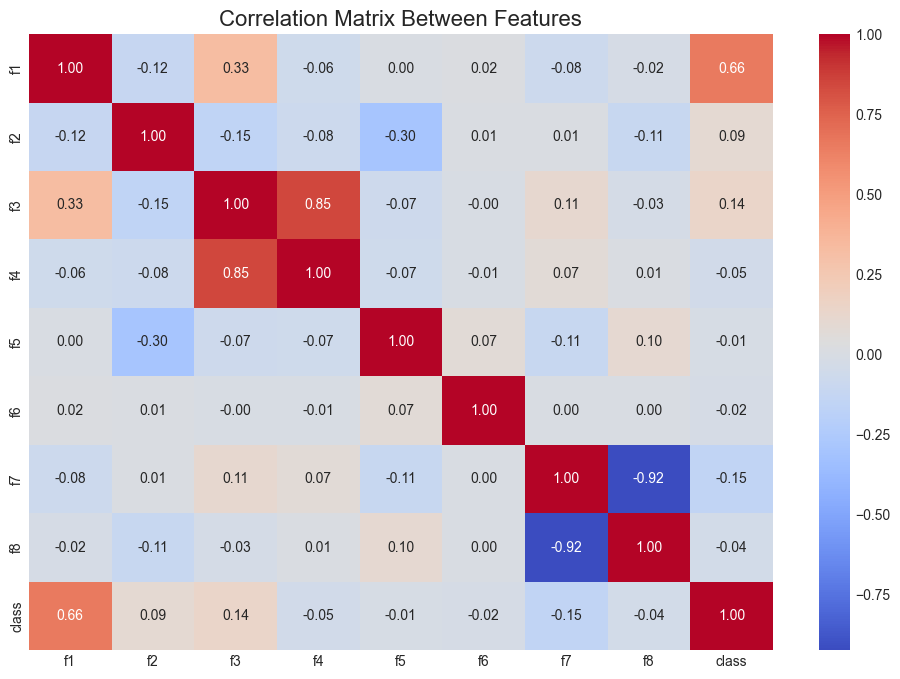


Features with the highest correlation with 'class':


f1    0.660840
f7    0.148297
f3    0.142128
f2    0.094943
f4    0.049808
f8    0.042386
f6    0.022184
f5    0.011023
Name: class, dtype: float64


--- 3. Class Distribution (Target Variable Analysis) ---
It is important to check for class imbalance in the dataset.


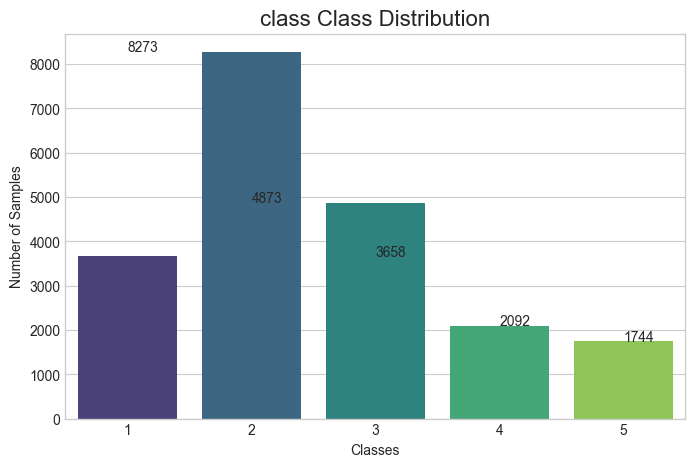


--- 4. Feature Distributions (Histograms) ---
Displays how each numerical feature is distributed.


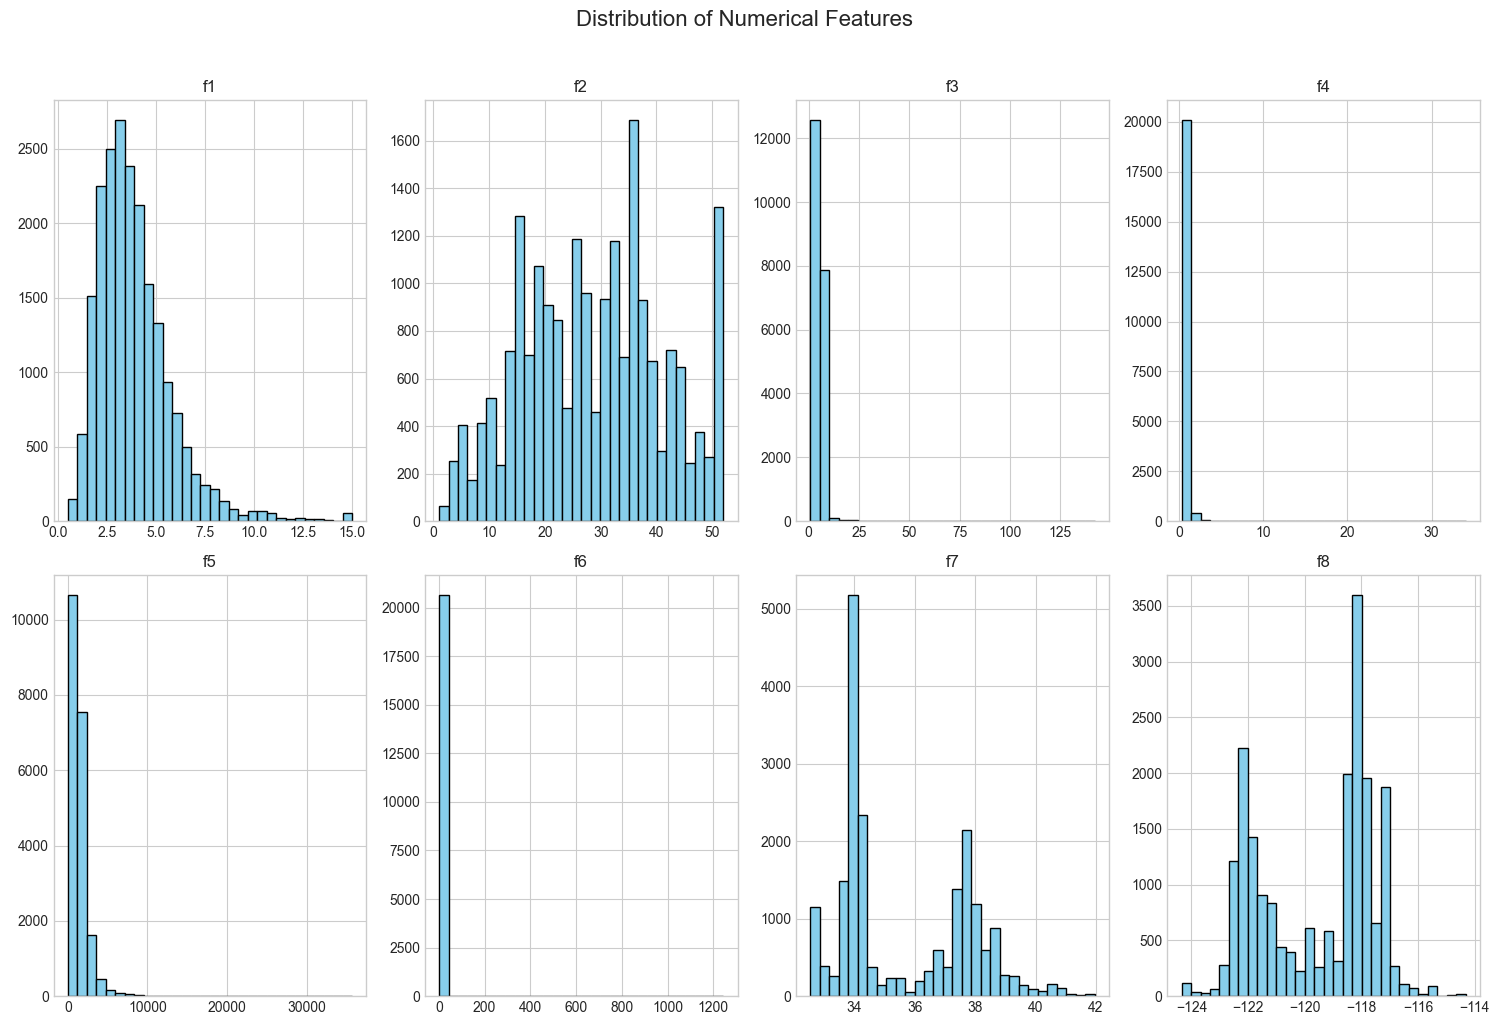


--- 5. Feature Separation by Class (Pairplot) ---
This plot visually shows which features distinguish between classes.
Note: This may take a long time if there are many features.


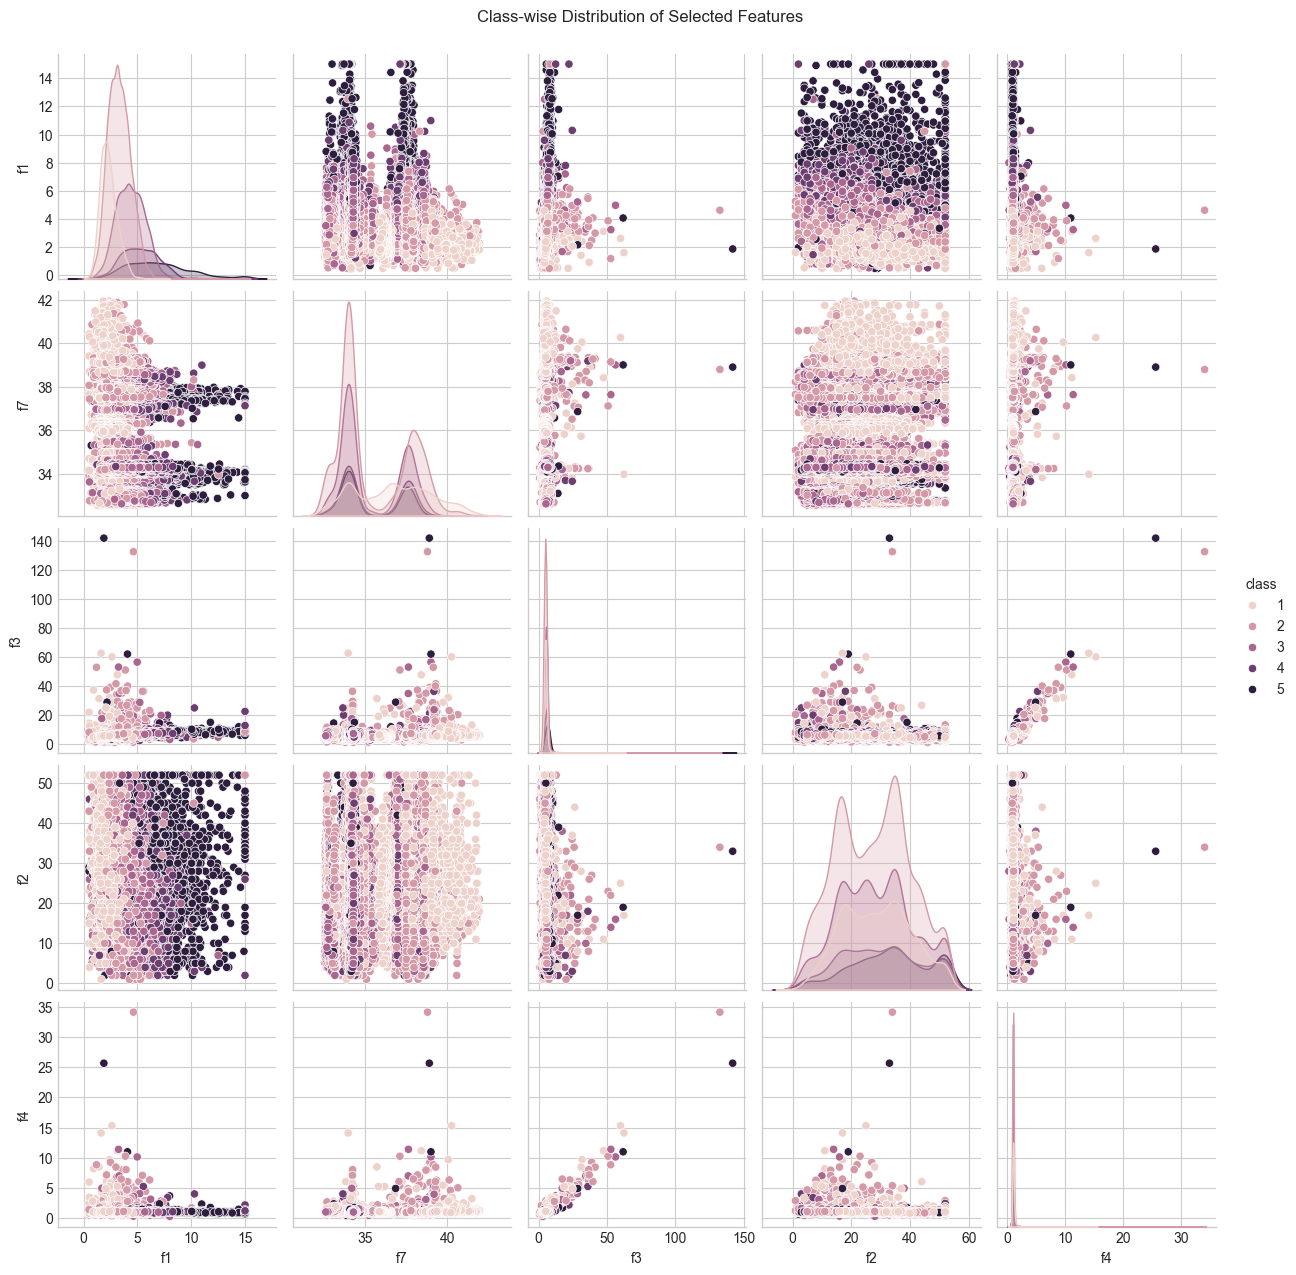

In [9]:
# =============================================================================
# HÜCRE 3: KEŞİFSEL VERİ ANALİZİ (EDA)
# Bu hücre, veri setini görselleştirerek ve istatistiksel olarak analiz ederek
# içgörüler elde etmemizi sağlar. Bu analizler, özellik seçimi ve model
# geliştirme kararlarımızı yönlendirecektir.
# =============================================================================

if 'df' in locals() and df is not None:
    print("--- 1. Statistical Summary of Numerical Features ---")
    display(df.describe().T)

    print("\n--- 2. Correlation Matrix ---")
    print("Shows the linear relationships among features and with the target variable.")
    plt.figure(figsize=(12, 8))
    # Sadece sayısal sütunları dahil etmek için numeric_only=True kullanılıyor
    correlation_matrix = df.corr(numeric_only=True)
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix Between Features', fontsize=16)
    plt.show()

    # Hedef değişkenle en yüksek korelasyona sahip özellikleri bulalım
    target_correlations = correlation_matrix[TARGET_COLUMN].abs().sort_values(ascending=False)
    print(f"\nFeatures with the highest correlation with '{TARGET_COLUMN}':")
    display(target_correlations.drop(TARGET_COLUMN)) # Hedefin kendisiyle korelasyonunu gösterme

    print("\n--- 3. Class Distribution (Target Variable Analysis) ---")
    print("It is important to check for class imbalance in the dataset.")
    plt.figure(figsize=(8, 5))
    sns.countplot(x=TARGET_COLUMN, data=df, palette='viridis')
    plt.title(f'{TARGET_COLUMN} Class Distribution', fontsize=16)
    plt.xlabel('Classes')
    plt.ylabel('Number of Samples')
    # Her barın üzerine sayısını yazdıralım
    for index, value in enumerate(df[TARGET_COLUMN].value_counts()):
        plt.text(index, value + 10, str(value))
    plt.show()
    
    print("\n--- 4. Feature Distributions (Histograms) ---")
    print("Displays how each numerical feature is distributed.")
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()
    df[numerical_features].hist(bins=30, figsize=(15, 10), layout=(-1, 4), color='skyblue', edgecolor='black')
    plt.suptitle('Distribution of Numerical Features', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    print("\n--- 5. Feature Separation by Class (Pairplot) ---")
    print("This plot visually shows which features distinguish between classes.")
    print("Note: This may take a long time if there are many features.")
    # Performans için en önemli 5 özelliği alalım (hedef hariç)
    top_features_for_pairplot = target_correlations.drop(TARGET_COLUMN).head(5).index.tolist()
    # Pairplot'a hedef değişkeni de ekleyelim
    pairplot_cols = top_features_for_pairplot + [TARGET_COLUMN]
    
    sns.pairplot(df[pairplot_cols], hue=TARGET_COLUMN, diag_kind='kde')
    plt.suptitle('Class-wise Distribution of Selected Features', y=1.02)
    plt.show()

else:
    print("❌ Please run Cell 2 first to load the dataset.")


In [10]:
# =============================================================================
# HÜCRE 4: VERİ BÖLME VE ÖLÇEKLENDİRME
# Bu hücre, veri setini makine öğrenmesi için hazırlar.
# 1. Veriyi Eğitim (Training) ve Test setlerine ayırır.
# 2. Bilgi sızmasını (data leakage) önlemek için ölçeklendirme işlemini
#    DOĞRU sırada uygular:
#       - Scaler, SADECE eğitim verisi üzerinde 'fit' edilir.
#       - Hem eğitim hem de test verisi, öğrenilen bu ölçekle 'transform' edilir.
# =============================================================================

if 'X' in locals() and 'y' in locals():
    # --- 1. Veriyi Eğitim ve Test Setlerine Ayırma ---
    # test_size: Verinin yüzde kaçının test için ayrılacağını belirtir (%25).
    # random_state: Bölme işleminin her seferinde aynı olmasını sağlar (tekrarlanabilirlik).
    # stratify=y: Sınıf dağılımının eğitim ve test setlerinde korunmasını sağlar.
    #              Bu, özellikle dengesiz veri setleri için ÇOK ÖNEMLİDİR.
    try:
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, 
            test_size=0.25, 
            random_state=42,
            stratify=y  # <-- Sınıf oranlarını koru!
        )
        print("--- 1. Data Successfully Split ---")
        print(f"Training Set Size (X_train): {X_train.shape}")
        print(f"Test Set Size     (X_test):  {X_test.shape}")
        
        print("\nTraining Set Class Distribution:")
        print(y_train.value_counts(normalize=True))
        
        print("\nTest Set Class Distribution:")
        print(y_test.value_counts(normalize=True))

    except Exception as e:
        print(f"❌ An error occurred while splitting the data: {e}")
        print("The dataset might be too small or 'stratify' may not be applicable.")
        # Stratify olmadan tekrar dene
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
        print("Split attempted without 'stratify'.")

    # --- 2. Veriyi Ölçeklendirme (Standardizasyon) ---
    scaler = StandardScaler()

    # Scaler'ı SADECE EĞİTİM VERİSİNE UYGULA (FIT)
    # Sadece sayısal sütunlar üzerinde fit/transform yapmalıyız.
    numerical_features = X_train.select_dtypes(include=np.number).columns
    
    # Kopyalar üzerinde çalışmak orijinal veriyi korur
    X_train_scaled = X_train.copy()
    X_test_scaled = X_test.copy()

    # Öğren ve dönüştür
    X_train_scaled[numerical_features] = scaler.fit_transform(X_train[numerical_features])
    # Sadece dönüştür
    X_test_scaled[numerical_features] = scaler.transform(X_test[numerical_features])
    
    print("\n\n--- 2. Data Successfully Scaled ---")
    print("Scaled Training Data (First 5 Rows):")
    display(X_train_scaled.head())

else:
    print("❌ Please run Cell 2 first to define X and y.")


--- 1. Data Successfully Split ---
Training Set Size (X_train): (15480, 8)
Test Set Size     (X_test):  (5160, 8)

Training Set Class Distribution:
class
2    0.400840
3    0.236111
1    0.177196
4    0.101357
5    0.084496
Name: proportion, dtype: float64

Test Set Class Distribution:
class
2    0.400775
3    0.236047
1    0.177326
4    0.101357
5    0.084496
Name: proportion, dtype: float64


--- 2. Data Successfully Scaled ---
Scaled Training Data (First 5 Rows):


,f1,f2,f3,f4,f5,f6,f7,f8
14297,-0.835484,1.058380,-0.660784,0.061950,-0.173782,-0.008198,-1.360837,1.209335
2846,-0.484461,0.025398,-0.022686,0.018729,0.101427,-0.064552,-0.102716,0.302146
6471,-0.328065,0.581619,-0.086691,-0.212265,-0.619358,-0.007315,-0.720084,0.750756
10068,0.132699,-0.848663,0.165827,0.094464,-0.821177,-0.033222,1.730680,-0.300985
8462,-0.272720,0.820000,-0.723258,-0.364633,-0.279497,0.017404,-0.804270,0.616173


In [14]:
# =============================================================================
# HÜCRE 4A: ÖZELLİK MÜHENDİSLİĞİ - YENİ ÖZELLİK OLUŞTURMA
# Hoca, performansı artırmak için yeni özellikler oluşturmanızı istediğinde bu
# hücreyi kullanın. Burada, mevcut özelliklerden mantıksal olarak yeni
# özellikler türetilir.
# =============================================================================

# Kopyalar üzerinde çalışmak her zaman daha güvenlidir
X_train_eng = X_train.copy()
X_test_eng = X_test.copy()

print("--- Feature Engineering Started ---")

# --- Yöntem 1: Polinomsal Özellikler ---
# Özellikler arasındaki etkileşimleri ve doğrusal olmayan ilişkileri yakalar.
# Örneğin, 'f1*f2', 'f1^2' gibi yeni özellikler oluşturur.
# Sadece en önemli 2-3 özellik üzerinden yapmak genellikle daha iyi sonuç verir.
if 'target_correlations' in locals():
    # En önemli 2 özelliği al (EDA hücresinden)
    top_2_features = target_correlations.drop(TARGET_COLUMN).head(2).index.tolist()
    print(f"Creating interaction features between top 2 features: {top_2_features}...")
    
    poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)
    
    # Eğitim verisi üzerinde hem fit hem transform yap
    X_train_poly = poly.fit_transform(X_train_eng[top_2_features])
    # Test verisi üzerinde SADECE transform yap
    X_test_poly = poly.transform(X_test_eng[top_2_features])
    
    # Yeni özellik isimlerini al ve DataFrame'e ekle
    poly_feature_names = poly.get_feature_names_out(top_2_features)
    X_train_poly_df = pd.DataFrame(X_train_poly, columns=poly_feature_names, index=X_train_eng.index)
    X_test_poly_df = pd.DataFrame(X_test_poly, columns=poly_feature_names, index=X_test_eng.index)
    
    # Orijinal DataFrame'e ekle (eski sütunları silip yenilerini ekleyerek)
    X_train_eng = pd.concat([X_train_eng.drop(columns=top_2_features), X_train_poly_df], axis=1)
    X_test_eng = pd.concat([X_test_eng.drop(columns=top_2_features), X_test_poly_df], axis=1)
    
    print("\nNewly created features:")
    display(X_train_eng.head())
else:
    print("Please run Cell 3 (EDA) first to compute correlations for polynomial features.")

# --- Yöntem 2: Alan Bilgisine Dayalı Özellik (Örnek: is_workhour) ---
# Eğer veri setinde 'date' veya 'time' gibi bir sütun varsa, bu çok güçlü olabilir.
# Not: Bu bölümü kendi veri setinize göre uyarlamanız gerekir.
if 'date' in X_train_eng.columns:
    print("\nDeriving 'is_workhour' feature from 'date' column...")
    # ... (Önceki ödevdeki gibi 'is_workhour' oluşturma kodu buraya gelebilir) ...
    pass

print("\n✅ Feature Engineering Completed.")
# Sonraki hücrelerde X_train_eng ve X_test_eng kullanılacak.


--- Feature Engineering Started ---
Creating interaction features between top 2 features: ['f1', 'f7']...

Newly created features:


,f2,f3,f4,f5,f6,f8,f1,f7,f1 f7
14297,42.0,3.828010,1.125307,1227.0,3.014742,-117.14,2.2804,32.72,74.614688
2846,29.0,5.383915,1.106222,1542.0,2.339909,-118.96,2.9470,35.41,104.353270
6471,36.0,5.227848,1.004219,717.0,3.025316,-118.06,3.2440,34.09,110.587960
10068,18.0,5.843575,1.139665,486.0,2.715084,-120.17,4.1190,39.33,162.000270
8462,39.0,3.675676,0.936937,1106.0,3.321321,-118.33,3.3491,33.91,113.567981



✅ Feature Engineering Completed.


In [15]:
# =============================================================================
# HÜCRE 4B: ÖZELLİK SEÇİMİ - GEREKSİZ ÖZELLİKLERİ KALDIRMA
# Hoca, en az etkisi olan özellikleri belirleyip modelden çıkarmanızı
# istediğinde bu hücreyi kullanın. Bu, modelin basitleşmesine ve bazen
# genelleme yeteneğinin artmasına yardımcı olur.
# =============================================================================

# Kaç tane özelliğin kaldırılacağını belirle
NUM_FEATURES_TO_REMOVE = 2  # <-- HOCANIN İSTEDİĞİ SAYIYLA DEĞİŞTİR

print(f"--- Removing the {NUM_FEATURES_TO_REMOVE} Least Important Features ---")

# --- Yöntem: Korelasyon Tabanlı Seçim ---
# Hedef değişkenle en düşük korelasyona sahip özellikleri en önemsiz kabul edebiliriz.
if 'target_correlations' in locals():
    # En düşük korelasyonlu özellikleri al (EDA hücresinden)
    features_to_remove = target_correlations.drop(TARGET_COLUMN).tail(NUM_FEATURES_TO_REMOVE).index.tolist()
    
    print(f"Features to be removed (lowest correlation): {features_to_remove}")
    
    # Özellikleri veri setinden kaldır
    X_train_reduced = X_train.drop(columns=features_to_remove)
    X_test_reduced = X_test.drop(columns=features_to_remove)
    
    print("\nRemaining features:")
    display(X_train_reduced.head())
    print("\n✅ Feature Selection Completed.")
    # Sonraki hücrelerde X_train_reduced ve X_test_reduced kullanılacak.
else:
    print("❌ Please run Cell 3 (EDA) first to calculate feature correlations.")


--- Removing the 2 Least Important Features ---
Features to be removed (lowest correlation): ['f6', 'f5']

Remaining features:


,f1,f2,f3,f4,f7,f8
14297,2.2804,42.0,3.828010,1.125307,32.72,-117.14
2846,2.9470,29.0,5.383915,1.106222,35.41,-118.96
6471,3.2440,36.0,5.227848,1.004219,34.09,-118.06
10068,4.1190,18.0,5.843575,1.139665,39.33,-120.17
8462,3.3491,39.0,3.675676,0.936937,33.91,-118.33



✅ Feature Selection Completed.


--- Training the Logistic Regression model ---
✅ Model trained successfully.

--- Model Performance (TRAIN Set) ---
Training Accuracy: 0.6065

--- Model Performance (TEST Set) ---
Test Accuracy: 0.5963

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.72      0.56      0.63       915
           2       0.62      0.77      0.68      2068
           3       0.50      0.57      0.53      1218
           4       0.42      0.08      0.13       523
           5       0.65      0.56      0.60       436

    accuracy                           0.60      5160
   macro avg       0.58      0.51      0.52      5160
weighted avg       0.59      0.60      0.58      5160


--- Generalization Analysis ---
Comment: Training (0.61) and test (0.60) accuracies are close. The model seems to generalize well.


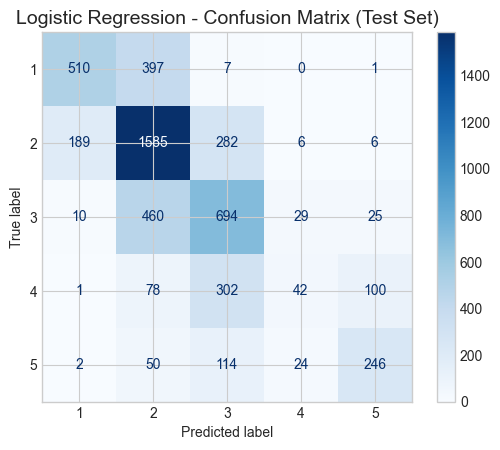


--- Feature Coefficients ---


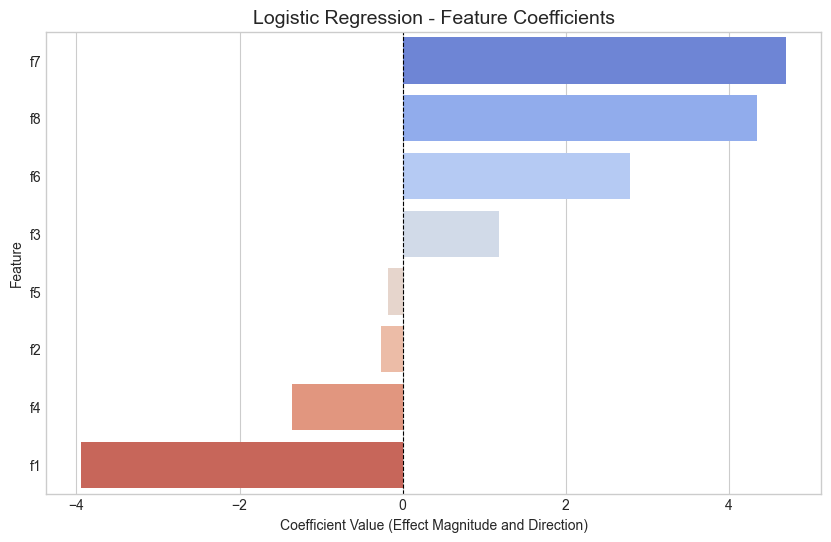

In [20]:
# =============================================================================
# HÜCRE 6: MODEL EĞİTİMİ VE ANALİZİ - LOGISTIC REGRESSION
# Bu hücre, Logistic Regression modelini eğitir, hem EĞİTİM hem de TEST
# performasını karşılaştırır ve sonuçları görselleştirir.
# =============================================================================

# --- 1. Modelin Tanımlanması ---
model_name = "Logistic Regression"
model = LogisticRegression(C=1.0, random_state=42, max_iter=1000)

# Kullanılacak veri setlerini seç
X_train_to_use = X_train_scaled
X_test_to_use = X_test_scaled

print(f"--- Training the {model_name} model ---")

# --- 2. Modelin Eğitilmesi ---
try:
    model.fit(X_train_to_use, y_train)
    print("✅ Model trained successfully.")

    # --- 3. Tahminlerin Yapılması ---
    y_train_pred = model.predict(X_train_to_use)  # EĞİTİM seti için tahmin
    y_test_pred = model.predict(X_test_to_use)    # TEST seti için tahmin

    # --- 4. Performans Değerlendirmesi ---
    
    # a) Eğitim Seti Performansı
    print("\n--- Model Performance (TRAIN Set) ---")
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {train_accuracy:.4f}")

    # b) Test Seti Performansı
    print("\n--- Model Performance (TEST Set) ---")
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # c) Overfitting/Underfitting Yorumu
    print("\n--- Generalization Analysis ---")
    if train_accuracy > test_accuracy + 0.05:
        print(f"Comment: Training accuracy ({train_accuracy:.2f}) is significantly higher than test accuracy ({test_accuracy:.2f}). The model may be OVERFITTING.")
    elif test_accuracy > train_accuracy:
        print("Comment: Test accuracy is higher than training accuracy. This rare case may indicate that the test set is easier or there might be data leakage. Still, the model seems to generalize well.")
    else:
        print(f"Comment: Training ({train_accuracy:.2f}) and test ({test_accuracy:.2f}) accuracies are close. The model seems to generalize well.")

    # --- 5. Görsel Analiz (Genellikle test seti üzerinden yapılır) ---
    
    # a) Karmaşıklık Matrisi (Test Seti)
    ConfusionMatrixDisplay.from_estimator(model, X_test_to_use, y_test, cmap=plt.cm.Blues)
    plt.title(f'{model_name} - Confusion Matrix (Test Set)', fontsize=14)
    plt.show()

    # b) Özellik Katsayıları (Feature Coefficients)
    print("\n--- Feature Coefficients ---")
    coefficients = pd.DataFrame({
        'Feature': X_train_to_use.columns,
        'Coefficient': model.coef_[0]
    }).sort_values(by='Coefficient', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='coolwarm')
    plt.title(f'{model_name} - Feature Coefficients', fontsize=14)
    plt.xlabel("Coefficient Value (Effect Magnitude and Direction)")
    plt.ylabel("Feature")
    plt.axvline(0, color='black', linewidth=0.8, linestyle='--')
    plt.show()

except Exception as e:
    print(f"❌ ERROR: An issue occurred while training the {model_name} model: {e}")


--- Training the K-Nearest Neighbors (KNN) model ---
✅ Model trained successfully.

--- Model Performance (TRAIN Set) ---
Training Accuracy: 0.7039

--- Model Performance (TEST Set) ---
Test Accuracy: 0.6213

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.76      0.70      0.72       915
           2       0.64      0.78      0.70      2068
           3       0.50      0.50      0.50      1218
           4       0.47      0.26      0.34       523
           5       0.73      0.49      0.59       436

    accuracy                           0.62      5160
   macro avg       0.62      0.55      0.57      5160
weighted avg       0.62      0.62      0.61      5160


--- Generalization Analysis ---
Comment: Training accuracy (0.70) is significantly higher than test accuracy (0.62). The model may be OVERFITTING (k might be too small).


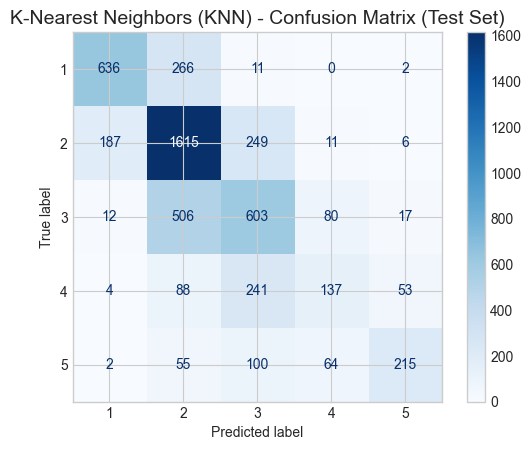


--- Feature Importance ---
Although KNN is not a 'black-box' model, it does not provide direct feature importance coefficients.
Feature importance can only be inferred indirectly, based on how features affect decision boundaries, which requires advanced analysis.


In [21]:
# =============================================================================
# HÜCRE 7: MODEL EĞİTİMİ VE ANALİZİ - K-NEAREST NEIGHBORS (KNN)
# Bu hücre, KNN modelini eğitir, hem EĞİTİM hem de TEST performansını
# karşılaştırır ve sonuçlarını görselleştirir.
# =============================================================================

# --- 1. Modelin Tanımlanması ---
model_name = "K-Nearest Neighbors (KNN)"
# n_neighbors (k): Karar vermek için bakılacak komşu sayısı.
# Genellikle tek sayı seçilir. Küçük k overfitting'e, büyük k underfitting'e yol açabilir.
model = KNeighborsClassifier(n_neighbors=7)  # k değerini buradan ayarlayabilirsiniz

# Kullanılacak veri setlerini seç
X_train_to_use = X_train_scaled
X_test_to_use = X_test_scaled

print(f"--- Training the {model_name} model ---")

# --- 2. Modelin Eğitilmesi ---
try:
    model.fit(X_train_to_use, y_train)
    print("✅ Model trained successfully.")

    # --- 3. Tahminlerin Yapılması ---
    y_train_pred = model.predict(X_train_to_use)
    y_test_pred = model.predict(X_test_to_use)

    # --- 4. Performans Değerlendirmesi ---
    print("\n--- Model Performance (TRAIN Set) ---")
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {train_accuracy:.4f}")

    print("\n--- Model Performance (TEST Set) ---")
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # --- Genelleme Durumu Analizi ---
    print("\n--- Generalization Analysis ---")
    if train_accuracy > test_accuracy + 0.05:
        print(f"Comment: Training accuracy ({train_accuracy:.2f}) is significantly higher than test accuracy ({test_accuracy:.2f}). The model may be OVERFITTING (k might be too small).")
    else:
        print(f"Comment: Training ({train_accuracy:.2f}) and test ({test_accuracy:.2f}) accuracies are close. The model seems to generalize well.")

    # --- 5. Görsel Analiz ---
    # a) Karmaşıklık Matrisi (Test Seti)
    ConfusionMatrixDisplay.from_estimator(model, X_test_to_use, y_test, cmap=plt.cm.Blues)
    plt.title(f'{model_name} - Confusion Matrix (Test Set)', fontsize=14)
    plt.show()

    # b) Özellik Önemi
    print("\n--- Feature Importance ---")
    print("Although KNN is not a 'black-box' model, it does not provide direct feature importance coefficients.")
    print("Feature importance can only be inferred indirectly, based on how features affect decision boundaries, which requires advanced analysis.")

except Exception as e:
    print(f"❌ ERROR: An issue occurred while training the {model_name} model: {e}")


--- Training the Support Vector Machine (SVM) model ---
✅ Model trained successfully.

--- Model Performance (TRAIN Set) ---
Training Accuracy: 0.6562

--- Model Performance (TEST Set) ---
Test Accuracy: 0.6393

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.78      0.65      0.71       915
           2       0.66      0.81      0.73      2068
           3       0.51      0.62      0.56      1218
           4       0.60      0.17      0.27       523
           5       0.79      0.47      0.59       436

    accuracy                           0.64      5160
   macro avg       0.67      0.54      0.57      5160
weighted avg       0.65      0.64      0.62      5160


--- Generalization Analysis ---
Comment: Training (0.66) and test (0.64) accuracies are close. The model seems to generalize well.


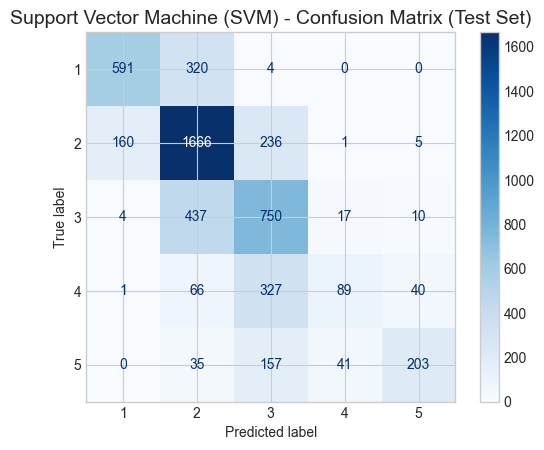


--- Feature Importance ---
The SVM model uses the 'rbf' kernel, so it does not provide direct feature importance coefficients.
To estimate feature importance, advanced methods such as Permutation Importance are required.


In [22]:
# =============================================================================
# HÜCRE 8: MODEL EĞİTİMİ VE ANALİZİ - SUPPORT VECTOR MACHINE (SVM)
# Bu hücre, SVM modelini eğitir, hem EĞİTİM hem de TEST performansını
# karşılaştırır ve sonuçlarını görselleştirir.
# =============================================================================

# --- 1. Modelin Tanımlanması ---
model_name = "Support Vector Machine (SVM)"
# kernel: Karar sınırının şeklini belirler. 'rbf' (doğrusal olmayan) en yaygın olanıdır. 'linear' da kullanılabilir.
# C: Regülarizasyon parametresi. Hatalı sınıflandırmalara ne kadar ceza verileceğini belirler.
# gamma: 'rbf' kernelinin ne kadar 'esnek' olacağını belirler.
model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

# Kullanılacak veri setlerini seç
X_train_to_use = X_train_scaled
X_test_to_use = X_test_scaled

print(f"--- Training the {model_name} model ---")

# --- 2. Modelin Eğitilmesi ---
try:
    model.fit(X_train_to_use, y_train)
    print("✅ Model trained successfully.")

    # --- 3. Tahminlerin Yapılması ---
    y_train_pred = model.predict(X_train_to_use)
    y_test_pred = model.predict(X_test_to_use)

    # --- 4. Performans Değerlendirmesi ---
    print("\n--- Model Performance (TRAIN Set) ---")
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {train_accuracy:.4f}")

    print("\n--- Model Performance (TEST Set) ---")
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # --- Genelleme Durumu Analizi ---
    print("\n--- Generalization Analysis ---")
    if train_accuracy > test_accuracy + 0.05:
        print(f"Comment: Training accuracy ({train_accuracy:.2f}) is significantly higher than test accuracy ({test_accuracy:.2f}). The model may be OVERFITTING (C or gamma might be too high).")
    else:
        print(f"Comment: Training ({train_accuracy:.2f}) and test ({test_accuracy:.2f}) accuracies are close. The model seems to generalize well.")

    # --- 5. Görsel Analiz ---
    # a) Karmaşıklık Matrisi (Test Seti)
    ConfusionMatrixDisplay.from_estimator(model, X_test_to_use, y_test, cmap=plt.cm.Blues)
    plt.title(f'{model_name} - Confusion Matrix (Test Set)', fontsize=14)
    plt.show()

    # b) Özellik Önemi
    print("\n--- Feature Importance ---")
    if model.kernel == 'linear':
        # ... (Logistic Regression'daki gibi coef_ grafiği çizilebilir) ...
        print("The model uses a 'linear' kernel, so feature coefficients can be analyzed.")
    else:
        print(f"The SVM model uses the '{model.kernel}' kernel, so it does not provide direct feature importance coefficients.")
        print("To estimate feature importance, advanced methods such as Permutation Importance are required.")

except Exception as e:
    print(f"❌ ERROR: An issue occurred while training the {model_name} model: {e}")


--- Training the Decision Tree model ---
✅ Model trained successfully.

--- Model Performance (TRAIN Set) ---
Training Accuracy: 1.0000

--- Model Performance (TEST Set) ---
Test Accuracy: 0.6409

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.72      0.72      0.72       915
           2       0.72      0.71      0.72      2068
           3       0.57      0.58      0.57      1218
           4       0.39      0.40      0.40       523
           5       0.61      0.61      0.61       436

    accuracy                           0.64      5160
   macro avg       0.60      0.60      0.60      5160
weighted avg       0.64      0.64      0.64      5160


--- Generalization Analysis ---
Comment: Training accuracy (1.00) is significantly higher than test accuracy (0.64). The model is OVERFITTING (consider limiting max_depth).


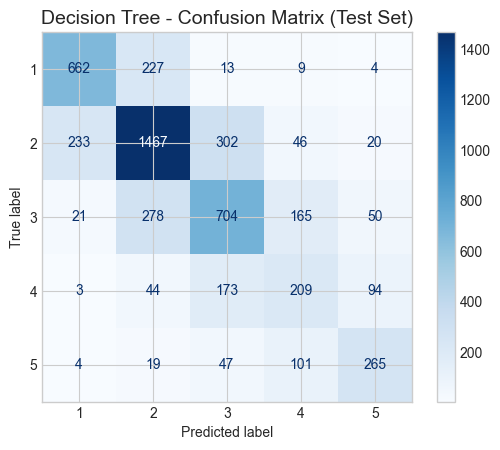


--- Feature Importance ---
The tree shows how much each feature contributes to the decision process via information gain.


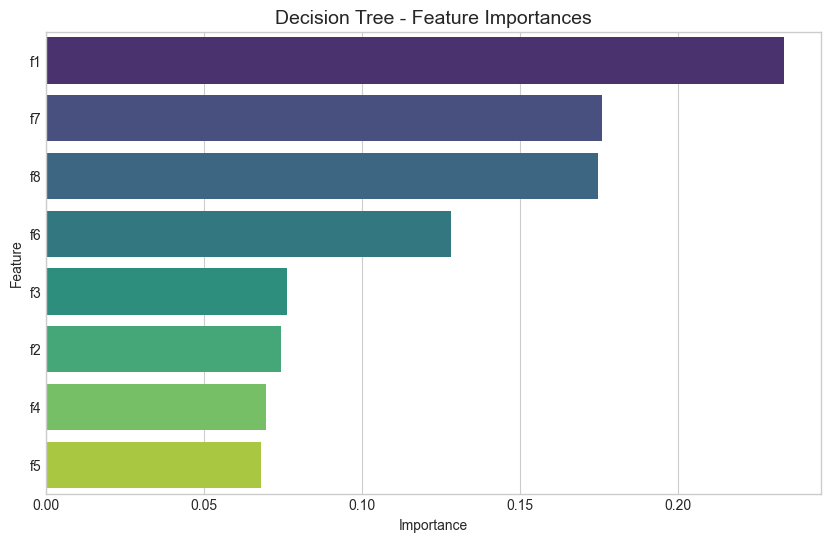

In [23]:
# =============================================================================
# HÜCRE 9: MODEL EĞİTİMİ VE ANALİZİ - DECISION TREE
# Bu hücre, Decision Tree modelini eğitir, hem EĞİTİM hem de TEST performansını
# karşılaştırır ve sonuçlarını görselleştirir.
# =============================================================================

# --- 1. Modelin Tanımlanması ---
model_name = "Decision Tree"
# max_depth: Ağacın maksimum derinliği. None ise ağaç tam olarak büyür. Overfitting'i kontrol için en önemli parametre.
model = DecisionTreeClassifier(max_depth=None, random_state=42)

# Kullanılacak veri setlerini seç
X_train_to_use = X_train_scaled
X_test_to_use = X_test_scaled

print(f"--- Training the {model_name} model ---")

# --- 2. Modelin Eğitilmesi ---
try:
    model.fit(X_train_to_use, y_train)
    print("✅ Model trained successfully.")

    # --- 3. Tahminlerin Yapılması ---
    y_train_pred = model.predict(X_train_to_use)
    y_test_pred = model.predict(X_test_to_use)

    # --- 4. Performans Değerlendirmesi ---
    print("\n--- Model Performance (TRAIN Set) ---")
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {train_accuracy:.4f}")

    print("\n--- Model Performance (TEST Set) ---")
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # --- Genelleme Durumu Analizi ---
    print("\n--- Generalization Analysis ---")
    if train_accuracy > test_accuracy + 0.05:
        print(f"Comment: Training accuracy ({train_accuracy:.2f}) is significantly higher than test accuracy ({test_accuracy:.2f}). The model is OVERFITTING (consider limiting max_depth).")
    else:
        print(f"Comment: Training ({train_accuracy:.2f}) and test ({test_accuracy:.2f}) accuracies are close. The model seems to generalize well.")

    # --- 5. Görsel Analiz ---
    # a) Karmaşıklık Matrisi (Test Seti)
    ConfusionMatrixDisplay.from_estimator(model, X_test_to_use, y_test, cmap=plt.cm.Blues)
    plt.title(f'{model_name} - Confusion Matrix (Test Set)', fontsize=14)
    plt.show()

    # b) Özellik Önemi (Feature Importance)
    print("\n--- Feature Importance ---")
    print("The tree shows how much each feature contributes to the decision process via information gain.")
    importances = pd.DataFrame({
        'Feature': X_train_to_use.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
    plt.title(f'{model_name} - Feature Importances', fontsize=14)
    plt.show()

except Exception as e:
    print(f"❌ ERROR: An issue occurred while training the {model_name} model: {e}")


--- Training the Random Forest model ---
✅ Model trained successfully.

--- Model Performance (TRAIN Set) ---
Training Accuracy: 1.0000

--- Model Performance (TEST Set) ---
Test Accuracy: 0.7192

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.83      0.74      0.78       915
           2       0.74      0.84      0.79      2068
           3       0.64      0.66      0.65      1218
           4       0.60      0.39      0.47       523
           5       0.75      0.65      0.70       436

    accuracy                           0.72      5160
   macro avg       0.71      0.66      0.68      5160
weighted avg       0.72      0.72      0.71      5160


--- Generalization Analysis ---
Comment: Training accuracy (1.00) is significantly higher than test accuracy (0.72). The model may be OVERFITTING (try pruning trees using max_depth or similar parameters).


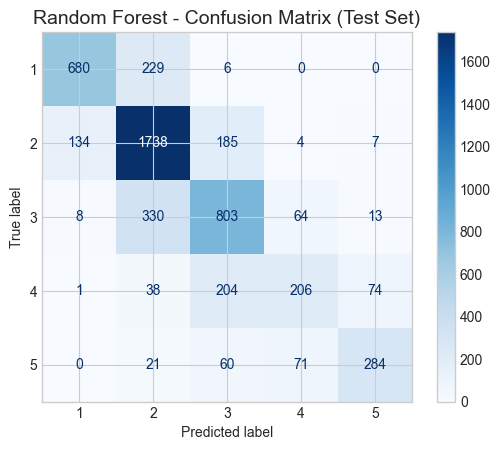


--- Feature Importance ---
Displays the average information gain from all trees in the forest.


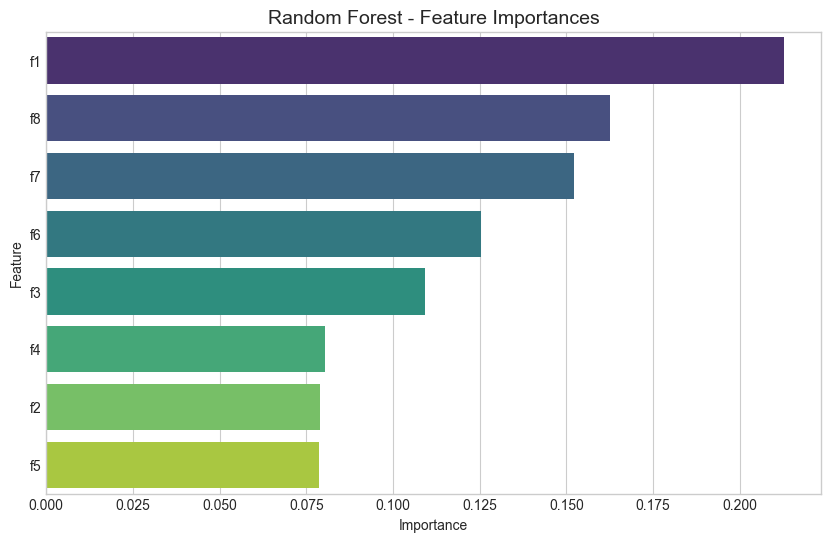

In [24]:
# =============================================================================
# HÜCRE 10: MODEL EĞİTİMİ VE ANALİZİ - RANDOM FOREST
# Bu hücre, Random Forest modelini eğitir, hem EĞİTİM hem de TEST performansını
# karşılaştırır ve sonuçlarını görselleştirir.
# =============================================================================

# --- 1. Modelin Tanımlanması ---
model_name = "Random Forest"
# n_estimators: Ormandaki ağaç sayısı. Genellikle ne kadar çok o kadar iyi, ama bir yerden sonra performans artışı durur.
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Kullanılacak veri setlerini seç
X_train_to_use = X_train_scaled
X_test_to_use = X_test_scaled

print(f"--- Training the {model_name} model ---")

# --- 2. Modelin Eğitilmesi ---
try:
    model.fit(X_train_to_use, y_train)
    print("✅ Model trained successfully.")

    # --- 3. Tahminlerin Yapılması ---
    y_train_pred = model.predict(X_train_to_use)
    y_test_pred = model.predict(X_test_to_use)

    # --- 4. Performans Değerlendirmesi ---
    print("\n--- Model Performance (TRAIN Set) ---")
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {train_accuracy:.4f}")

    print("\n--- Model Performance (TEST Set) ---")
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # --- Genelleme Durumu Analizi ---
    print("\n--- Generalization Analysis ---")
    if train_accuracy > test_accuracy + 0.05:
        print(f"Comment: Training accuracy ({train_accuracy:.2f}) is significantly higher than test accuracy ({test_accuracy:.2f}). The model may be OVERFITTING (try pruning trees using max_depth or similar parameters).")
    else:
        print(f"Comment: Training ({train_accuracy:.2f}) and test ({test_accuracy:.2f}) accuracies are close. The model seems to generalize well.")

    # --- 5. Görsel Analiz ---
    # a) Karmaşıklık Matrisi (Test Seti)
    ConfusionMatrixDisplay.from_estimator(model, X_test_to_use, y_test, cmap=plt.cm.Blues)
    plt.title(f'{model_name} - Confusion Matrix (Test Set)', fontsize=14)
    plt.show()

    # b) Özellik Önemi (Feature Importance)
    print("\n--- Feature Importance ---")
    print("Displays the average information gain from all trees in the forest.")
    importances = pd.DataFrame({
        'Feature': X_train_to_use.columns,
        'Importance': model.feature_importances_
    }).sort_values(by='Importance', ascending=False)
    
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=importances, palette='viridis')
    plt.title(f'{model_name} - Feature Importances', fontsize=14)
    plt.show()

except Exception as e:
    print(f"❌ ERROR: An issue occurred while training the {model_name} model: {e}")


--- Training the Gaussian Naive Bayes model ---
✅ Model trained successfully.

--- Model Performance (TRAIN Set) ---
Training Accuracy: 0.3616

--- Model Performance (TEST Set) ---
Test Accuracy: 0.3554

Classification Report (Test Set):
              precision    recall  f1-score   support

           1       0.59      0.40      0.47       915
           2       0.54      0.07      0.12      2068
           3       0.28      0.91      0.43      1218
           4       0.55      0.05      0.10       523
           5       0.58      0.44      0.50       436

    accuracy                           0.36      5160
   macro avg       0.51      0.37      0.33      5160
weighted avg       0.49      0.36      0.29      5160


--- Generalization Analysis ---
Comment: Training (0.36) and test (0.36) accuracies are close. The model seems to generalize well.


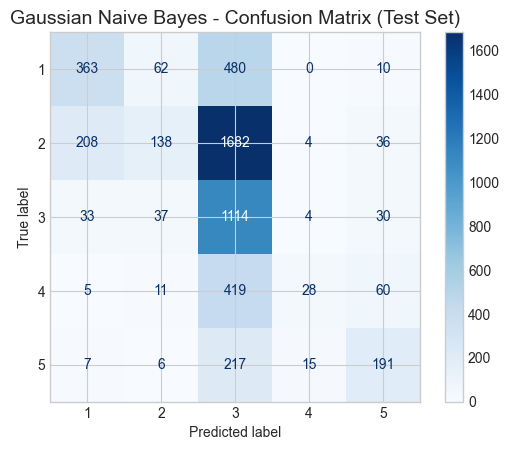


--- Feature Importance ---
Naive Bayes assumes feature independence and does not provide direct 'feature importance' or 'coefficients'.
The effect of features can be analyzed via class-wise likelihood distributions, which requires advanced analysis.


In [25]:
# =============================================================================
# HÜCRE 11: MODEL EĞİTİMİ VE ANALİZİ - NAIVE BAYES
# Bu hücre, Gaussian Naive Bayes modelini eğitir, hem EĞİTİM hem de TEST
# performansını karşılaştırır ve sonuçlarını görselleştirir.
# =============================================================================

# --- 1. Modelin Tanımlanması ---
model_name = "Gaussian Naive Bayes"
# Naive Bayes'in genellikle ayarlanacak önemli bir hiperparametresi yoktur.
model = GaussianNB()

# Kullanılacak veri setlerini seç
X_train_to_use = X_train_scaled
X_test_to_use = X_test_scaled

print(f"--- Training the {model_name} model ---")

# --- 2. Modelin Eğitilmesi ---
try:
    model.fit(X_train_to_use, y_train)
    print("✅ Model trained successfully.")

    # --- 3. Tahminlerin Yapılması ---
    y_train_pred = model.predict(X_train_to_use)
    y_test_pred = model.predict(X_test_to_use)

    # --- 4. Performans Değerlendirmesi ---
    print("\n--- Model Performance (TRAIN Set) ---")
    train_accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Training Accuracy: {train_accuracy:.4f}")

    print("\n--- Model Performance (TEST Set) ---")
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    print("\nClassification Report (Test Set):")
    print(classification_report(y_test, y_test_pred))

    # --- Genelleme Durumu Analizi ---
    print("\n--- Generalization Analysis ---")
    if train_accuracy > test_accuracy + 0.05:
        print(f"Comment: Training accuracy ({train_accuracy:.2f}) is significantly higher than test accuracy ({test_accuracy:.2f}). The model may be OVERFITTING.")
    else:
        print(f"Comment: Training ({train_accuracy:.2f}) and test ({test_accuracy:.2f}) accuracies are close. The model seems to generalize well.")

    # --- 5. Görsel Analiz ---
    # a) Karmaşıklık Matrisi (Test Seti)
    ConfusionMatrixDisplay.from_estimator(model, X_test_to_use, y_test, cmap=plt.cm.Blues)
    plt.title(f'{model_name} - Confusion Matrix (Test Set)', fontsize=14)
    plt.show()

    # b) Özellik Önemi
    print("\n--- Feature Importance ---")
    print("Naive Bayes assumes feature independence and does not provide direct 'feature importance' or 'coefficients'.")
    print("The effect of features can be analyzed via class-wise likelihood distributions, which requires advanced analysis.")

except Exception as e:
    print(f"❌ ERROR: An issue occurred while training the {model_name} model: {e}")
